# Linear Regression
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrychowanda/COMP6577/blob/master/COMP6577-2.ipynb)

Import required packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load & profile the data

In [2]:
!wget https://raw.githubusercontent.com/jethrozach/AI-GSLC/main/heart.csv

--2021-12-13 07:43:24--  https://raw.githubusercontent.com/jethrozach/AI-GSLC/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2021-12-13 07:43:25 (74.4 MB/s) - ‘heart.csv’ saved [11328/11328]



In [3]:
HeartDiseaseData = pd.read_csv("heart.csv")
print(HeartDiseaseData.dtypes)
print(HeartDiseaseData.isna().values.any())

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
False


In [4]:
print(HeartDiseaseData.info())
print(HeartDiseaseData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...  

Select particular column, and visualise the data (histogram)

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


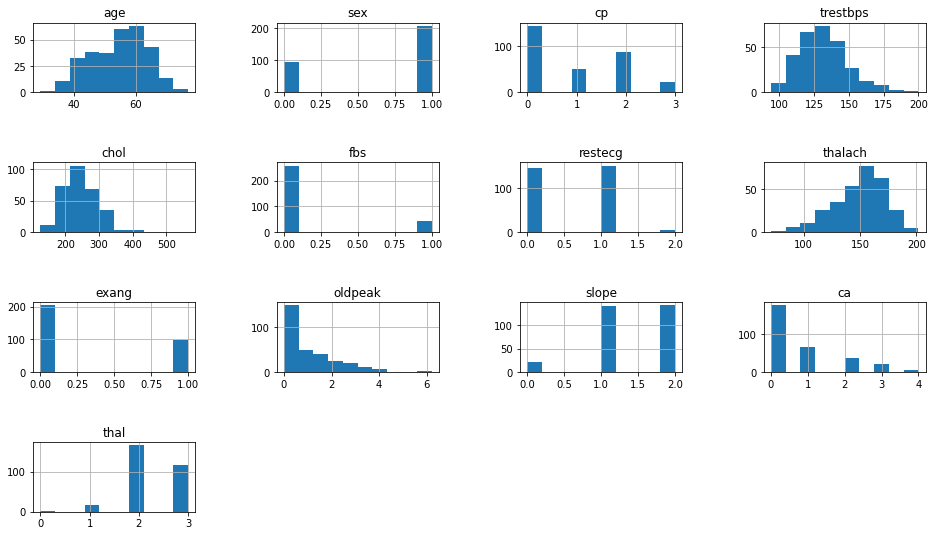

In [6]:
newHeartDiseaseData = HeartDiseaseData[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]
print(HeartDiseaseData.head())
newHeartDiseaseData.hist()
plt.subplots_adjust(hspace = 1, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,16]
plt.show()

Visualise the data (Scatter)

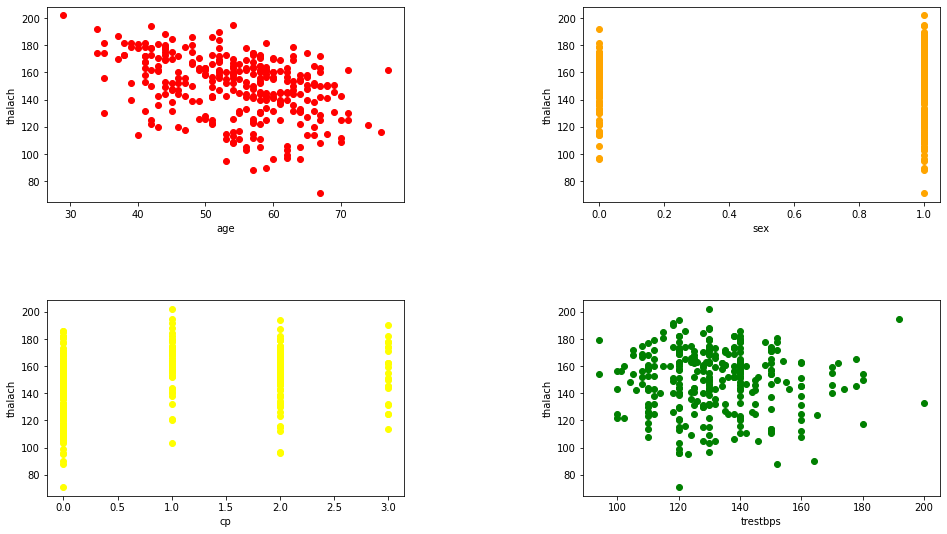

In [25]:
plt.subplot(221)
plt.scatter(newHeartDiseaseData["age"], newHeartDiseaseData["thalach"], color="red")
plt.xlabel("age")
plt.ylabel("thalach")

plt.subplot(222)
plt.scatter(newHeartDiseaseData["sex"], newHeartDiseaseData["thalach"], color="orange")
plt.xlabel("sex")
plt.ylabel("thalach")

plt.subplot(223)
plt.scatter(newHeartDiseaseData["cp"], newHeartDiseaseData["thalach"], color="yellow")
plt.xlabel("cp")
plt.ylabel("thalach")

plt.subplot(224)
plt.scatter(newHeartDiseaseData["trestbps"], newHeartDiseaseData["thalach"], color="green")
plt.xlabel("trestbps")
plt.ylabel("thalach")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Regression - Cp

In [27]:
train, test = train_test_split(newHeartDiseaseData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["cp"]], train[["thalach"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[5.7930916]]
Intercept:  [144.58593323]


Visualise the regression to the plot

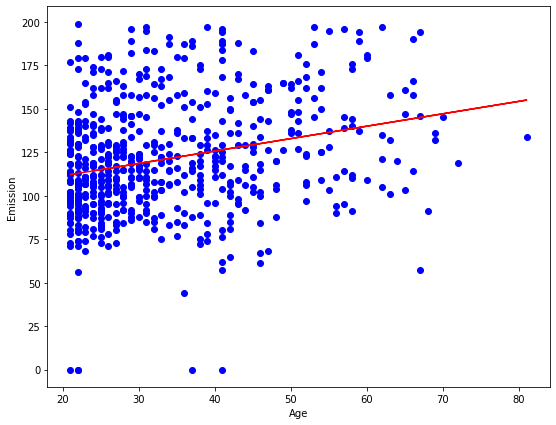

In [ ]:
plt.scatter(train["cp"], train["thalach"],  color='blue')
plt.plot(train[["cp"]], regression.coef_ * train[["cp"]] + regression.intercept_, '-r')
plt.xlabel("cp")
plt.ylabel("Emission")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Make the visualisation easier with Seaborn Package

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


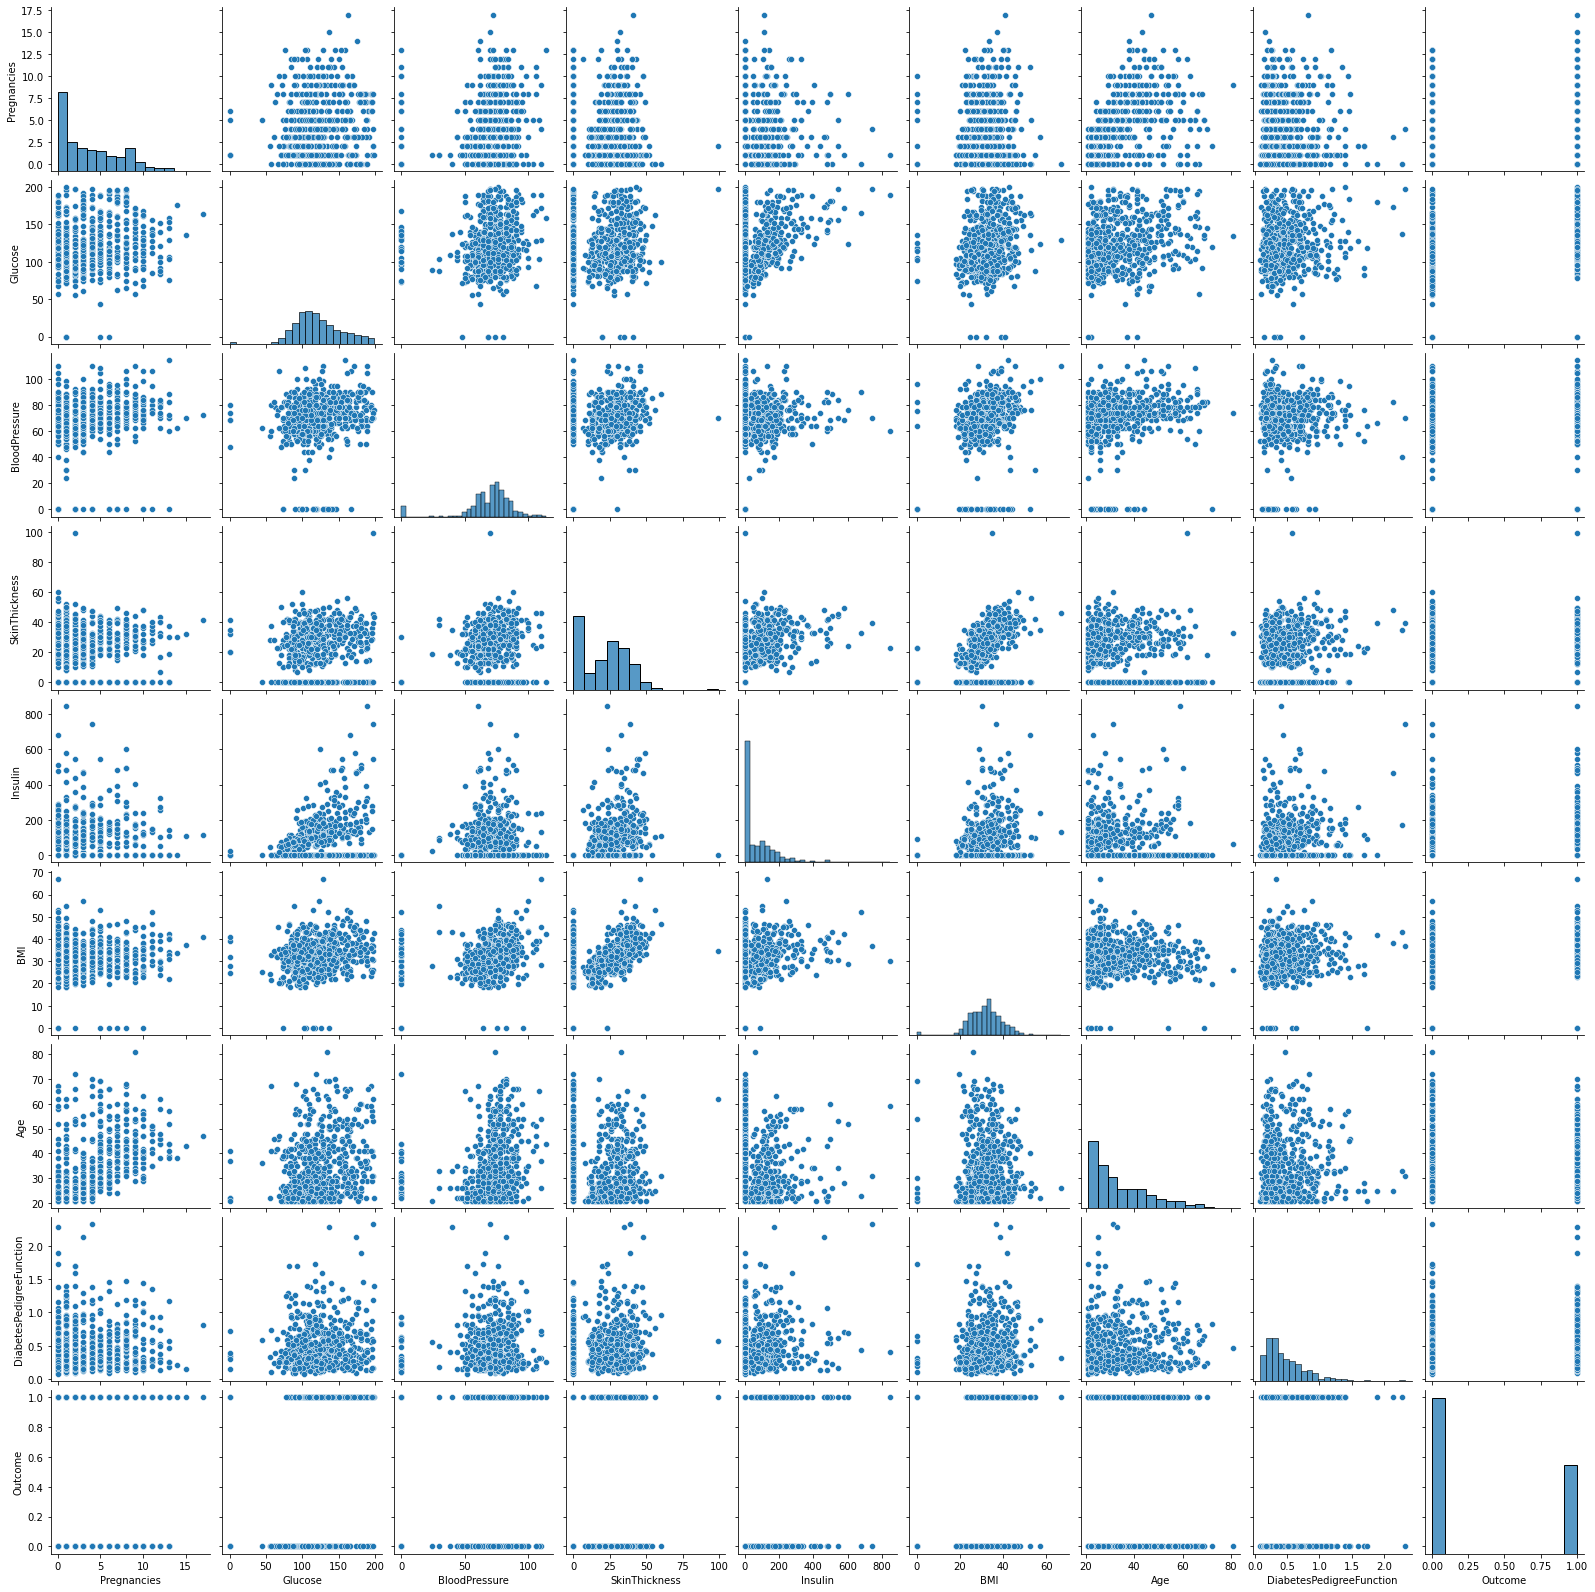

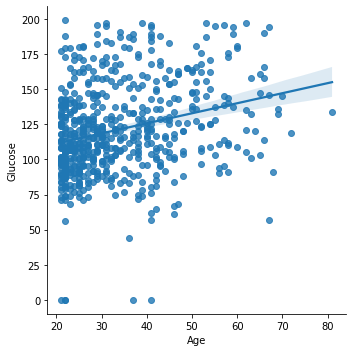

In [ ]:
sb.pairplot(train)
sb.lmplot("cp", "thalach", data = train)
plt.show()

Predict new data & evaluate the model

In [28]:
prediction = regression.predict(test[["cp"]])
for i in range(len(test)):
  print(test[["cp"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["thalach"]], prediction))
print("MSE : ", mean_squared_error(test[["thalach"]], prediction))
print("R2 : ", r2_score(test[["thalach"]], prediction))


[1] [150.37902482]
[2] [156.17211642]
[2] [156.17211642]
[0] [144.58593323]
[1] [150.37902482]
[2] [156.17211642]
[0] [144.58593323]
[0] [144.58593323]
[2] [156.17211642]
[2] [156.17211642]
[0] [144.58593323]
[0] [144.58593323]
[0] [144.58593323]
[0] [144.58593323]
[2] [156.17211642]
[0] [144.58593323]
[0] [144.58593323]
[0] [144.58593323]
[0] [144.58593323]
[0] [144.58593323]
[1] [150.37902482]
[3] [161.96520802]
[0] [144.58593323]
[2] [156.17211642]
[2] [156.17211642]
[0] [144.58593323]
[2] [156.17211642]
[3] [161.96520802]
[2] [156.17211642]
[0] [144.58593323]
[0] [144.58593323]
[1] [150.37902482]
[2] [156.17211642]
[0] [144.58593323]
[0] [144.58593323]
[1] [150.37902482]
[2] [156.17211642]
[3] [161.96520802]
[2] [156.17211642]
[1] [150.37902482]
[1] [150.37902482]
[1] [150.37902482]
[2] [156.17211642]
[0] [144.58593323]
[1] [150.37902482]
[1] [150.37902482]
[0] [144.58593323]
[2] [156.17211642]
[2] [156.17211642]
[2] [156.17211642]
[0] [144.58593323]
[0] [144.58593323]
[1] [150.379